<a href="https://colab.research.google.com/github/p25-c4/plate_project/blob/main/0311_%EC%8B%9C%EA%B0%81%ED%99%94_js.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,459 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and dire

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rc("font",family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

In [5]:
df = pd.read_csv("/content/drive/MyDrive/PABA/data_file/SCALE불량.csv", encoding = 'euc_kr')
df.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<Axes: xlabel='rolling_method', ylabel='count'>

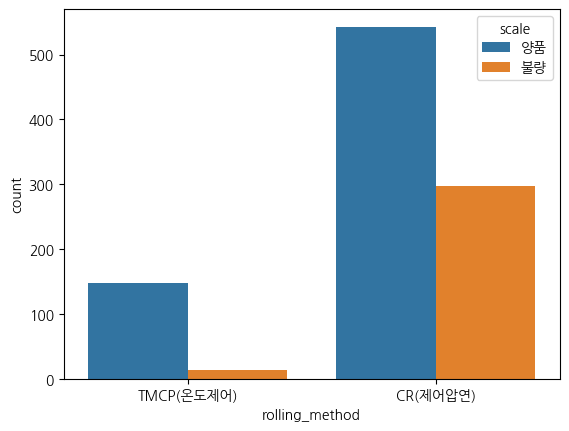

In [9]:
sns.countplot(x='rolling_method', hue = 'scale', data = df)



*   제어압연으로 압연한 후판이 불량률이 훨씬 높음
*   제어압연(천천히 냉각), TMCP(급냉시키기)



<Axes: xlabel='steel_kind', ylabel='count'>

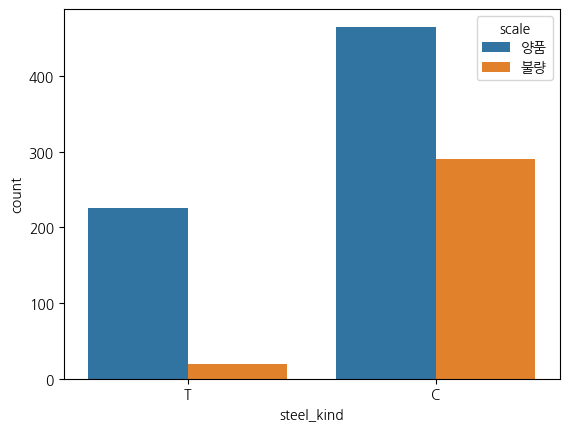

In [10]:
sns.countplot(x='steel_kind', hue = 'scale', data = df)

*   탄소강(C)이 티타늄강(T)보다 훨씬 불량률이 높음.
*   이유: 티타늄이 들어가면 철이 산소랑 반응을 못하게 막음.



In [11]:
# 결측치 처리 후 확인
df.isnull().sum(axis = 0)

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
fur_ex_temp        0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

<Axes: xlabel='work_group', ylabel='count'>

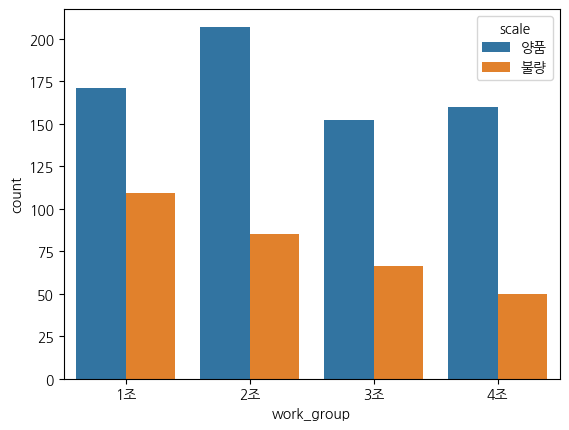

In [12]:
sns.countplot(x='work_group', hue = 'scale', data = df)



*   조마다 불량률이 다름.
    *   이유가 있는지? 4조 2교대 (7, 19시 기준 변경)
*   다른 변수들과의 관계(근무시간 등)  더 찾아봐야 연관성을 알 수 있을 듯



<Figure size 5000x5000 with 0 Axes>

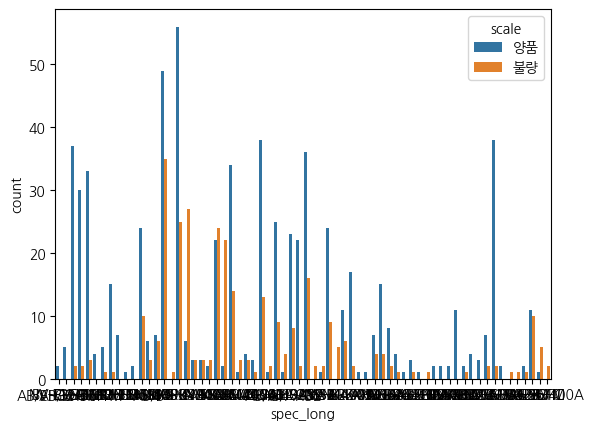

<Figure size 5000x5000 with 0 Axes>

In [ ]:
sns.countplot(x='spec_long', hue = 'scale', data = df)



*   그래프에 불량갯수가 더 많은 품목들도 있음.
*   제품 규격의 종류가 많아, 따로 목록으로 뽑아보기.



In [13]:
# 양품보다 불량이 더 많은 후판 규격.
grouped = df.groupby(['spec_long', 'scale']).size().unstack(fill_value=0)
bad_more_than_good = grouped[grouped['불량'] > grouped['양품']].index.tolist()
bad_more_than_good

['A131-DH36TM',
 'A283-C',
 'A516-60',
 'BV-AH36-TM',
 'CCS-B',
 'JS-SM400A',
 'JS-SM490A',
 'JS-SM490YA',
 'JS-SS400',
 'KR-A',
 'KR-B',
 'KS-SM400A',
 'KS-SM490A',
 'KS-SS400',
 'LR-EH32-TM',
 'NV-B']

<Axes: xlabel='spec_country', ylabel='count'>

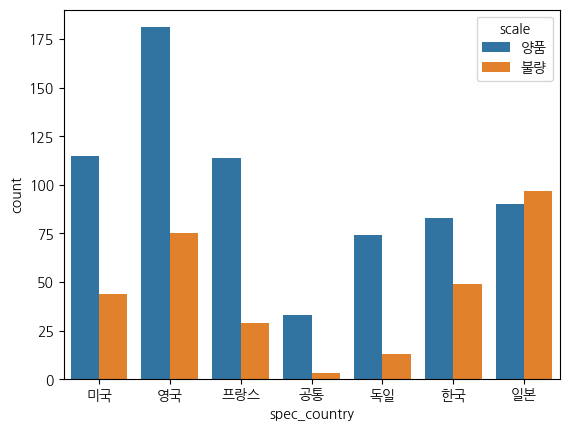

In [ ]:
# 나라 규격에 따른 후판 불량 갯수 확인
sns.countplot(x='spec_country', hue = 'scale', data = df)



*   일본 규격으로 만들어진 후판은 불량품이 더 많음
*   불량으로 만들어진 특정 두께, 폭, 길이가 있는지 관계해보기



<Axes: xlabel='fur_no', ylabel='count'>

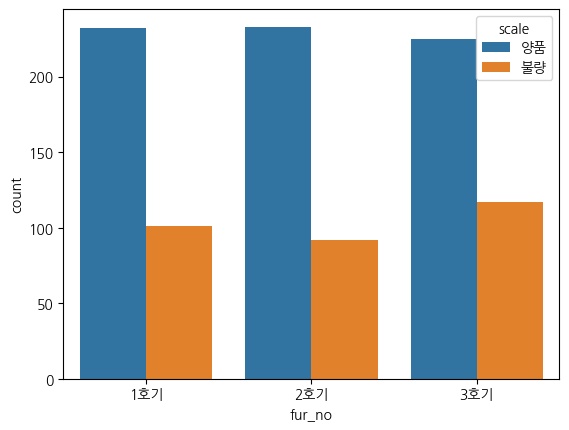

In [ ]:
# 가열로 호기에 따라 불량 수 확인
sns.countplot(x='fur_no', hue = 'scale', data = df)



*   가열로 호기에 따라 불량률이 크게 차이나지 않음



<Axes: xlabel='fur_input_row', ylabel='count'>

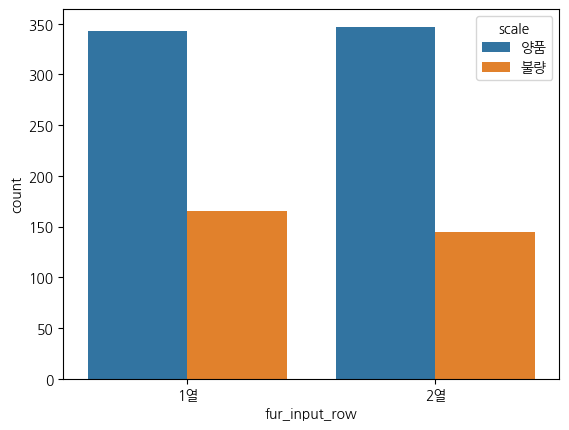

In [ ]:
# 가열로 장입열에 따른 불량 갯수 확인
sns.countplot(x='fur_input_row', hue = 'scale', data = df)



*   가열로 장입열과 불량률은 크게 차이나지 않음.



<Axes: xlabel='scale', ylabel='fur_heat_temp'>

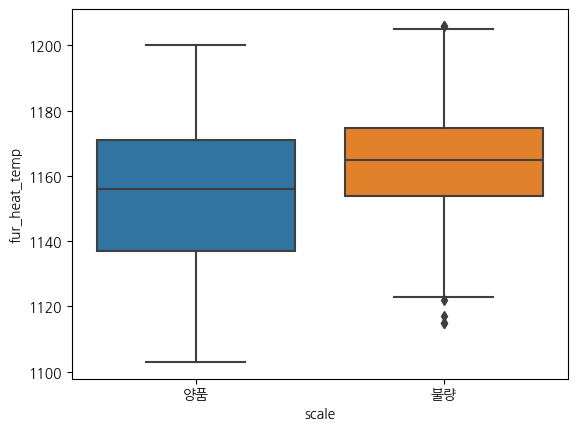

In [ ]:
# 가열대 소재온도와 Scale 유무 관계
sns.boxplot(y = 'fur_heat_temp', x = 'scale' , data = df)



*   가열로 가열대 소재온도 (들어갔을 때를 기준이라고 판단)
*   가열대 소재온도랑 불량 유무를 결정하기엔 어렵다고 판단됨



<Axes: xlabel='scale', ylabel='fur_heat_time'>

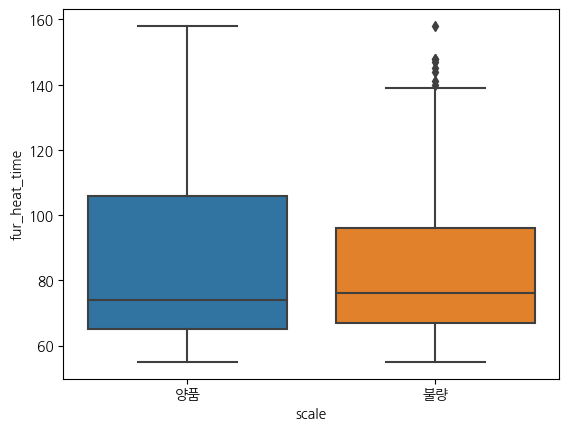

In [ ]:
# 가열대 재로시간과 Scale 유무 관계
sns.boxplot(y = 'fur_heat_time', x = 'scale' , data = df )

*   중앙값을 중심으로 값의 분포가 비대칭  
*   중앙값이 평균보다 작다.





<Axes: xlabel='scale', ylabel='fur_heat_temp'>

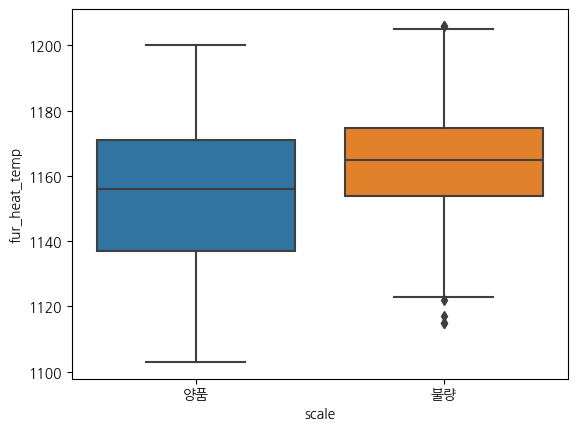

In [ ]:
# 가열대 소재온도와 Scale 유무 관계
sns.boxplot(y = 'fur_heat_temp', x = 'scale' , data = df)

<Axes: xlabel='scale', ylabel='fur_soak_temp'>

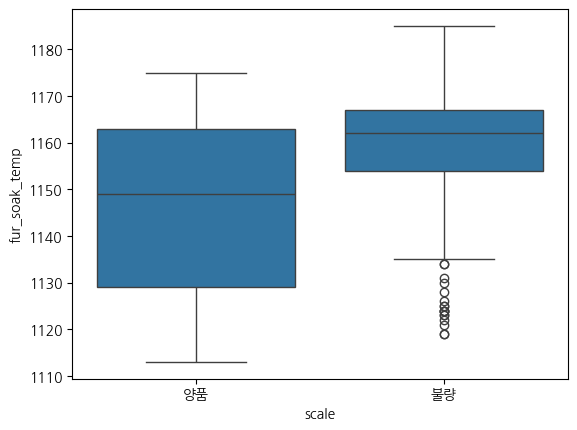

In [18]:
# 균열대 소재온도와 Sclae 유무 관계
sns.boxplot(y = 'fur_soak_temp', x = 'scale' , data = df )



*   불량의 이상치가 많음
*   불량인 친구들은 대부분 균열대로 갔을 때 온도가 높은 후판들이 Scale이 될 확률이 높음



<Axes: xlabel='scale', ylabel='fur_total_time'>

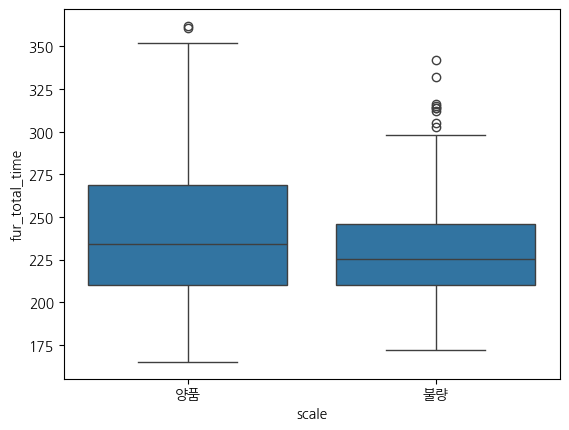

In [19]:
# 가열로 총 재로시간과 Scale 유무 관계
sns.boxplot(y = 'fur_total_time', x = 'scale' , data = df )

<Axes: xlabel='scale', ylabel='fur_ex_temp'>

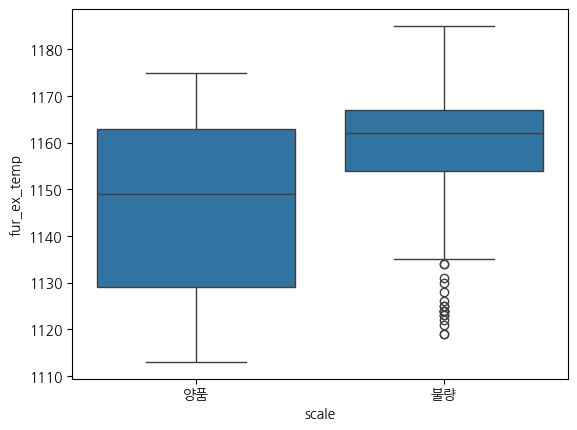

In [20]:
# 가열로 추출온도와 Scale 유무 관계
sns.boxplot(y = 'fur_ex_temp', x = 'scale' , data = df )



*   불량 후판은 가열로 추출온도가 훨씬 높음
*   낮은 온도에서 Scale이 생긴 후판은 이상치로 잡힘  
    -> 대부분의 Scale은 높은 온도에서 생긴다는 가정을 만들 수 있음



<Axes: xlabel='fur_soak_temp', ylabel='fur_ex_temp'>

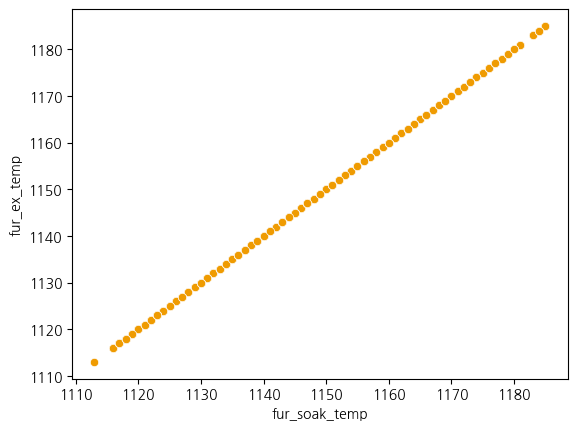

In [34]:
# 균열대 재로시간, 총 재로시간 그래프
sns.scatterplot(data=df, x="fur_soak_temp", y="fur_ex_temp",color = "#EF9B01")



*   개똑같죠?



<Axes: xlabel='scale', ylabel='rolling_temp'>

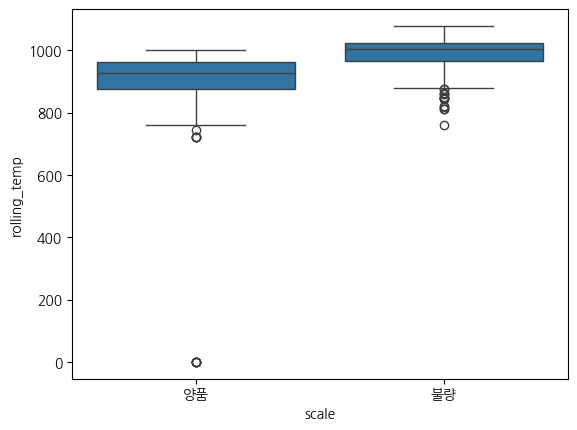

In [21]:
# 압연온도와 Scale 유무 관계
sns.boxplot(y = 'rolling_temp', x = 'scale' , data = df )

*   압연온도가 0도인 양품이 있음 (이상치 확인)

<Axes: xlabel='fur_heat_temp', ylabel='Count'>

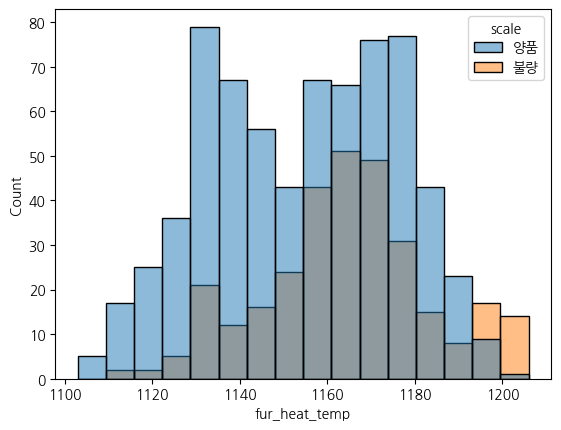

In [22]:
# 가열대 소재온도와 Scale 유무 확인
sns.histplot(x = 'fur_heat_temp', hue = 'scale' , data = df)

<Axes: xlabel='fur_heat_time', ylabel='Count'>

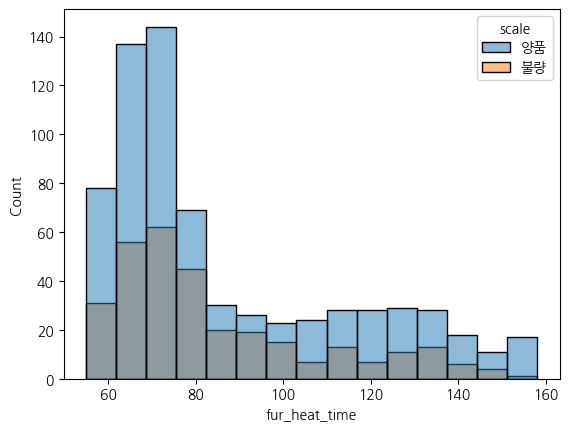

In [23]:
# 가열대 재로시간과 Scale 유무 확인
sns.histplot(x = 'fur_heat_time', hue = 'scale' , data = df)

In [30]:
# 조별 불량률
df['scale'] = df['scale'].map(lambda x : 0 if x == "양품" else 1)
df_groups = df.groupby(["work_group"])["scale"]
print(df_groups)
df_w = pd.DataFrame(columns = ["work_group", "PROB"])
for name, g in df_groups:
    df_w = df_w.append({"work_group" : name , "PROB" : g.tolist().count(1)/(g.shape[0])}, ignore_index = True )
df_w

,work_group,PROB
0,1조,0.389286
1,2조,0.291096
2,3조,0.302752
3,4조,0.238095


<Axes: >

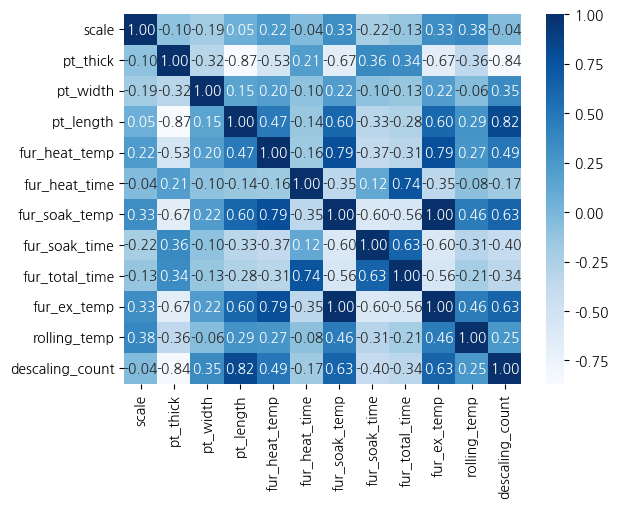

In [32]:
df_corr= df.corr().round(3)
sns.heatmap(df_corr, annot = True, fmt = ".2f", cmap= "Blues")

- pt_length와 descaling_count 의 상관계수가 0.82로 선형관계가 있다.
- pt_thick와 pt_length의 상관계수가 -0.87로 선형관계가 있다.
- pt_thick와 descaling_count의 상관계수가 -0.84로 선형관계가 있다.
- fur_heat_temp 와 fur_soak_temp 의 상관계수가 0.79로 선형관계가 있다.
- 모든 상관계수가 같은 것으로 보아 fur_soak_temp와 fur_ex_temp 는 같은 데이터이다.

<Axes: xlabel='fur_heat_temp', ylabel='fur_soak_temp'>

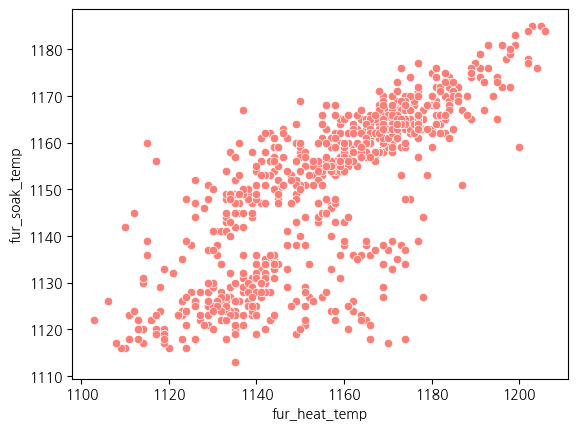

In [36]:
sns.scatterplot(data=df, x="fur_heat_temp", y="fur_soak_temp",color = "#FC7F77")



*   fur_heat_temp와 fur_soak_temp와 그룹화 돼있음.
*   세부적으로 볼 필요 있음



<Axes: xlabel='descaling_count', ylabel='count'>

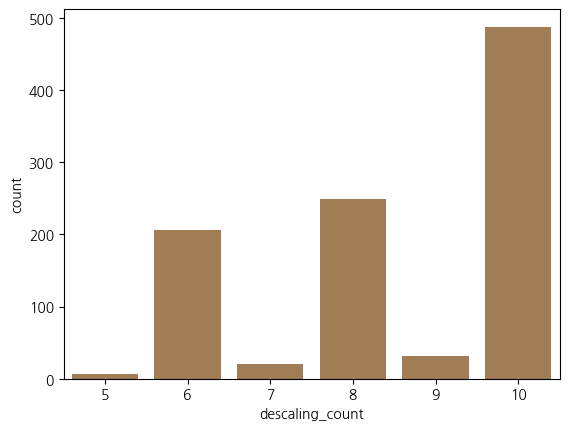

In [35]:
sns.countplot(data=df,x="descaling_count",color = "#AD7E47")



*   왜 짝수로 하면 불량이 많죠?

